# Images, imshow(), and Custom Colormaps

## Overview
Matplotlib can display images (arrays) and provides powerful color mapping tools for scientific visualization. This notebook covers image display, normalization, and building custom colormaps.

### What you'll learn
- Display 2D arrays with `imshow()`
- Control `origin`, `extent`, `interpolation`, and `aspect`
- Add colorbars and set value ranges (`vmin`, `vmax`)
- Normalization (linear, log)
- Create custom colormaps (ListedColormap / LinearSegmentedColormap)
- Display RGB images and inspect channels


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. imshow() Basics

### Core syntax
```python
im = ax.imshow(Z, cmap='viridis', origin='lower')
plt.colorbar(im, ax=ax)
```
### Key parameters
- `cmap`: colormap name
- `origin`: 'upper' or 'lower'
- `interpolation`: 'nearest', 'bilinear', 'bicubic'
- `aspect`: 'equal' or 'auto'
- `extent`: map array coordinates to real-world axes
- `vmin` / `vmax`: clamp color range


=== IMAGES: BASIC HEATMAP-LIKE DISPLAY ===


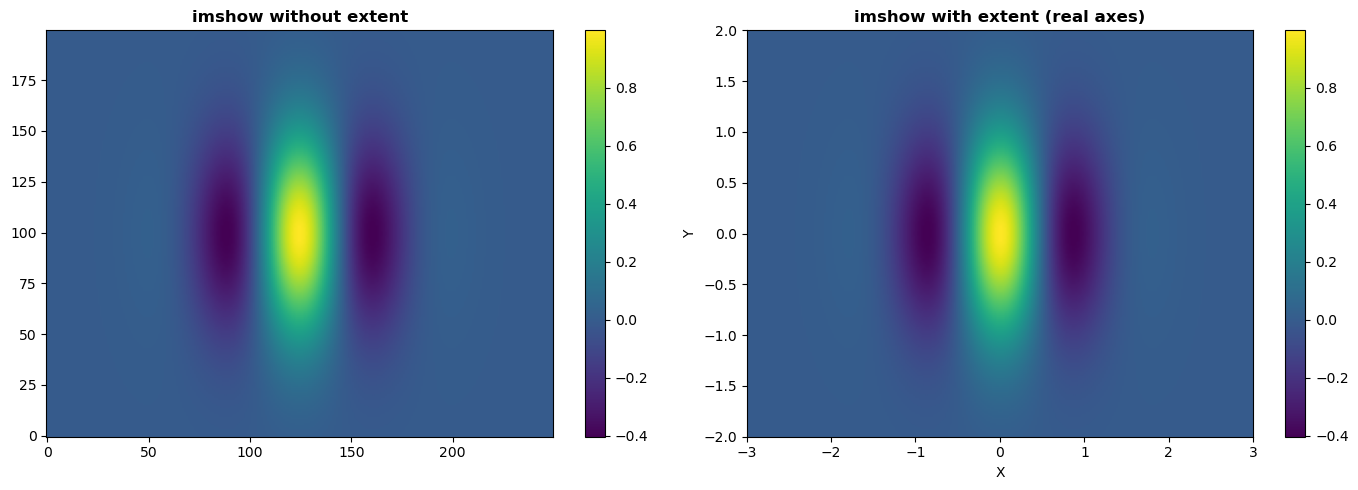

In [2]:
print('=== IMAGES: BASIC HEATMAP-LIKE DISPLAY ===')
x = np.linspace(-3, 3, 250)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)) * np.cos(3*X)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im0 = axes[0].imshow(Z, cmap='viridis', origin='lower', aspect='auto')
axes[0].set_title('imshow without extent', fontweight='bold')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(Z, cmap='viridis', origin='lower', aspect='auto',
                 extent=[x.min(), x.max(), y.min(), y.max()])
axes[1].set_title('imshow with extent (real axes)', fontweight='bold')
axes[1].set_xlabel('X'); axes[1].set_ylabel('Y')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

## 2. Clipping with vmin/vmax + Diverging Colormaps

For signed data (negative/positive), use a diverging colormap and symmetric limits to avoid misleading emphasis.

```python
v = np.max(np.abs(Z))
ax.imshow(Z, cmap='RdBu_r', vmin=-v, vmax=v)
```


=== DIVERGING IMAGE + SYMMETRIC LIMITS ===


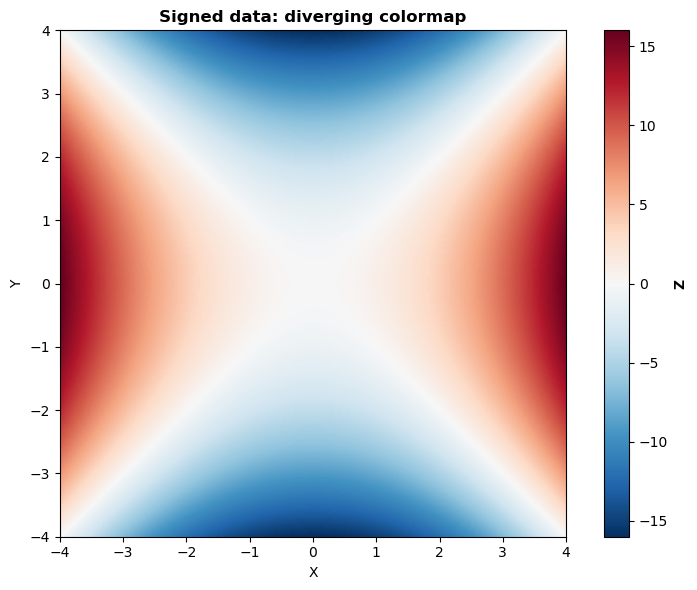

In [3]:
print('=== DIVERGING IMAGE + SYMMETRIC LIMITS ===')
x = np.linspace(-4, 4, 260)
y = np.linspace(-4, 4, 260)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2
v = np.max(np.abs(Z))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(Z, cmap='RdBu_r', origin='lower', vmin=-v, vmax=v,
             extent=[x.min(), x.max(), y.min(), y.max()])
ax.set_title('Signed data: diverging colormap', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Z', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Normalization (Linear vs Log)

When values span orders of magnitude (common in imaging/science), log scaling can reveal structure.

```python
norm = colors.LogNorm(vmin=1e-3, vmax=1)
ax.imshow(Z, norm=norm, cmap='magma')
```


=== LOG NORMALIZATION ===


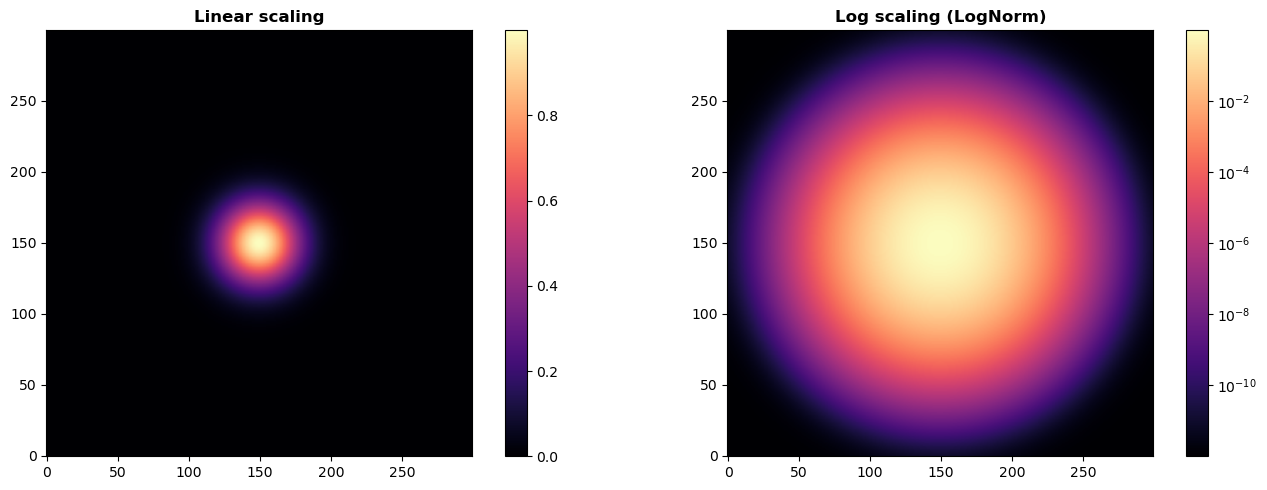

In [4]:
print('=== LOG NORMALIZATION ===')
# Construct a positive field with wide dynamic range
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))
Z = Z + 1e-4  # avoid zeros
Z = Z**3      # expand dynamic range

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im0 = axes[0].imshow(Z, cmap='magma', origin='lower')
axes[0].set_title('Linear scaling', fontweight='bold')
plt.colorbar(im0, ax=axes[0])

norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
im1 = axes[1].imshow(Z, cmap='magma', origin='lower', norm=norm)
axes[1].set_title('Log scaling (LogNorm)', fontweight='bold')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

## 4. Creating Custom Colormaps

### ListedColormap (discrete colors)
```python
cmap = ListedColormap(['#2c7bb6', '#abd9e9', '#ffffbf', '#fdae61', '#d7191c'])
```

### LinearSegmentedColormap (smooth gradient)
```python
cmap = LinearSegmentedColormap.from_list('mycmap', ['navy', 'white', 'firebrick'])
```
### Tip
Use perceptually uniform colormaps for continuous values (viridis/cividis). Use diverging maps for signed values.


=== CUSTOM COLORMAPS DEMO ===


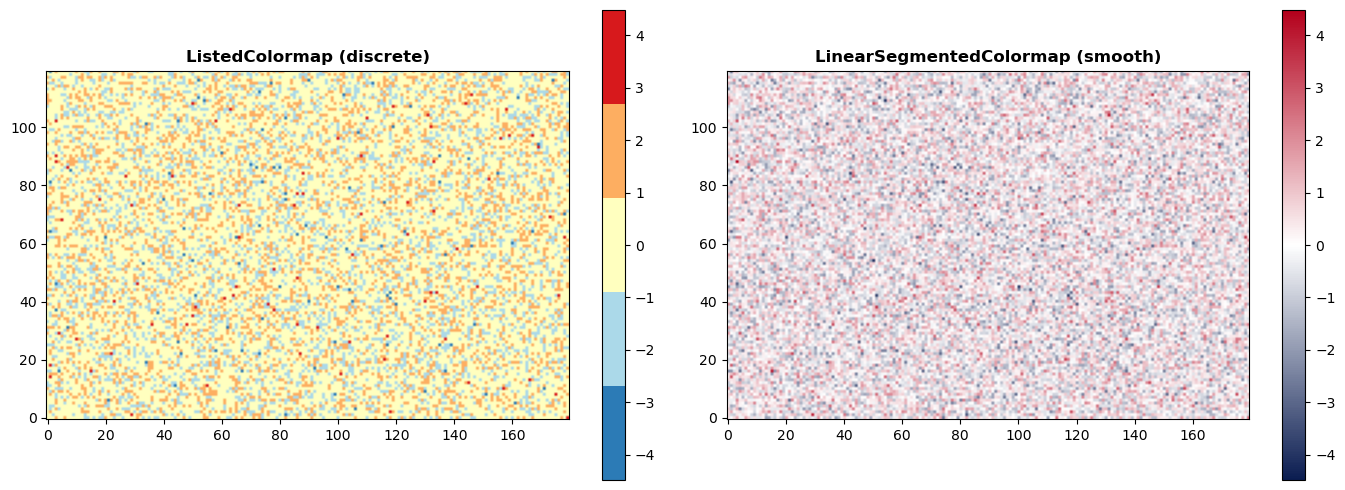

In [5]:
print('=== CUSTOM COLORMAPS DEMO ===')
Z = np.random.randn(120, 180)
v = np.max(np.abs(Z))

cmap_discrete = ListedColormap(['#2c7bb6', '#abd9e9', '#ffffbf', '#fdae61', '#d7191c'])
cmap_div = LinearSegmentedColormap.from_list('navy_white_red', ['#0B1D51', 'white', '#B3001B'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im0 = axes[0].imshow(Z, cmap=cmap_discrete, origin='lower', vmin=-v, vmax=v)
axes[0].set_title('ListedColormap (discrete)', fontweight='bold')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(Z, cmap=cmap_div, origin='lower', vmin=-v, vmax=v)
axes[1].set_title('LinearSegmentedColormap (smooth)', fontweight='bold')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

## 5. Displaying RGB Images + Channels

Matplotlib can show RGB(A) images using `imshow(img)` where `img` has shape (H, W, 3) or (H, W, 4).

Common operations:
- Inspect channels (R, G, B).
- Convert to grayscale (simple luminance approximation).
- Overlay alpha masks.


=== RGB IMAGE SYNTHETIC + CHANNELS ===


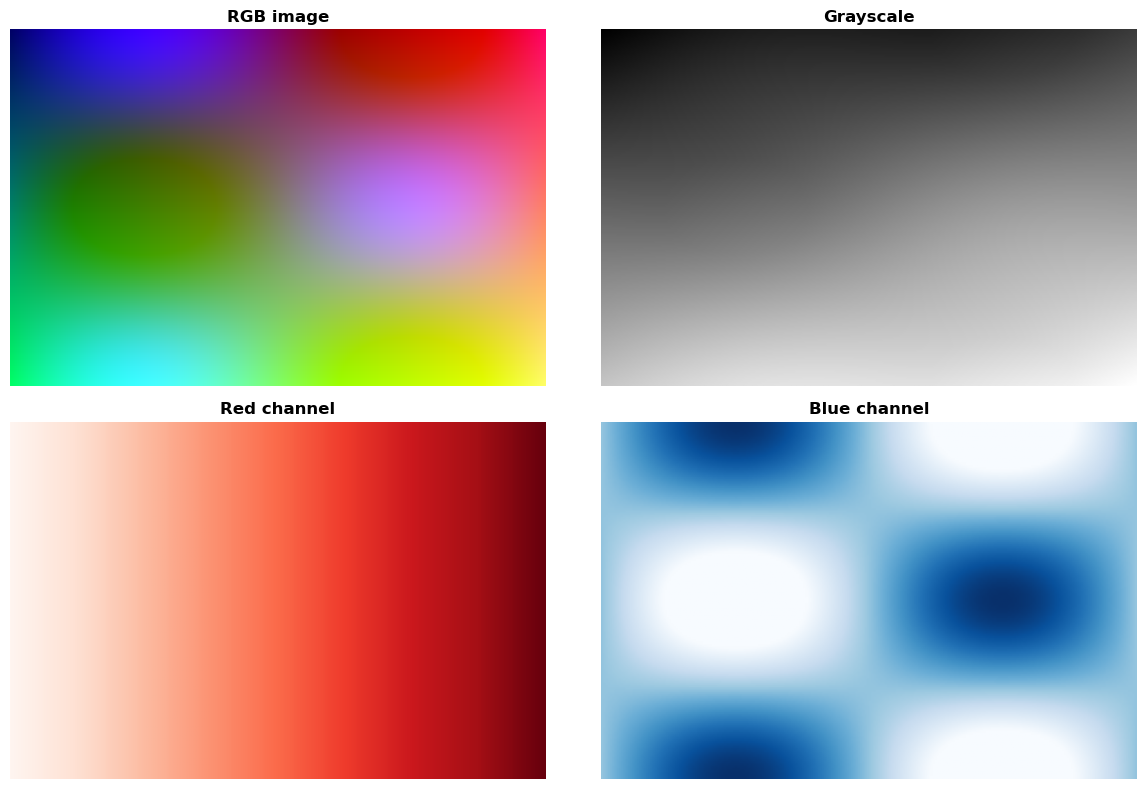

In [6]:
print('=== RGB IMAGE SYNTHETIC + CHANNELS ===')
H, W = 160, 240
x = np.linspace(0, 1, W)
y = np.linspace(0, 1, H)
X, Y = np.meshgrid(x, y)

R = X
G = Y
B = 0.4 + 0.6*np.sin(2*np.pi*X) * np.cos(2*np.pi*Y)
img = np.clip(np.dstack([R, G, B]), 0, 1)

gray = 0.2126*img[..., 0] + 0.7152*img[..., 1] + 0.0722*img[..., 2]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].imshow(img)
axes[0, 0].set_title('RGB image', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale', fontweight='bold')
axes[0, 1].axis('off')

axes[1, 0].imshow(img[..., 0], cmap='Reds')
axes[1, 0].set_title('Red channel', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(img[..., 2], cmap='Blues')
axes[1, 1].set_title('Blue channel', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Practice + Quick Reference

### Practice
1. Display a 2D array with different interpolations ('nearest', 'bilinear').
2. Use `extent` to map pixels to real units (e.g., meters).
3. Create a diverging custom colormap and apply symmetric limits.
4. Apply LogNorm to a synthetic astronomical-like image.
5. Load an external image with `plt.imread()` and inspect channels.

### Quick reference
```python
im = ax.imshow(Z, cmap='viridis', origin='lower', vmin=a, vmax=b, extent=[xmin, xmax, ymin, ymax])
plt.colorbar(im, ax=ax)

norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
ax.imshow(Z, cmap='magma', norm=norm)

cmap = LinearSegmentedColormap.from_list('mycmap', ['navy', 'white', 'firebrick'])
```
